# UltraInsight Project Code
## Description


### Setup

In [1]:
#setup
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.io as pio


#insert and read file
filename = "../archive (2)/TWO_CENTURIES_OF_UM_RACES.csv"
df = pd.read_csv(filename)
print(df)
df.head()

/var/folders/r6/y72_rzjs01v5mlmhssn_w27h0000gn/T/ipykernel_55520/2860455836.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing
/var/folders/r6/y72_rzjs01v5mlmhssn_w27h0000gn/T/ipykernel_55520/2860455836.py:12: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


         Year of event Event dates                                Event name  \
0                 2018  06.01.2018                       Selva Costera (CHI)   
1                 2018  06.01.2018                       Selva Costera (CHI)   
2                 2018  06.01.2018                       Selva Costera (CHI)   
3                 2018  06.01.2018                       Selva Costera (CHI)   
4                 2018  06.01.2018                       Selva Costera (CHI)   
...                ...         ...                                       ...   
7461190           1995  00.00.1995                 La SainteLyon 65 km (FRA)   
7461191           1995  00.00.1995                 La SainteLyon 65 km (FRA)   
7461192           1995  00.00.1995  Szombathely 24 hours running Race  (HUN)   
7461193           1995  00.00.1995  Szombathely 24 hours running Race  (HUN)   
7461194           1995  00.00.1995  Szombathely 24 hours running Race  (HUN)   

        Event distance/length  Event nu

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


### Data Preprocessing and Cleaning

In [2]:
# select most recent 10 years
year_cutoff = df['Year of event'].max() - 10
print(len(df))

df = df.dropna()
df = df.drop_duplicates()
print(len(df))

year_inds = df['Year of event'] >= year_cutoff
df = df[year_inds]
print(len(df))

print(df["Event distance/length"])

7461195
4419663
2934506
0          50km
1          50km
2          50km
3          50km
4          50km
           ... 
6823922    50km
6823923    50km
6823924    50km
6823925    50km
6823926    50km
Name: Event distance/length, Length: 2934506, dtype: object


In [3]:
#select km and mi races only, not timed ones
distance = df["Event distance/length"]
non_time_km = distance.str.contains('km', regex=False)
non_time_mi = distance.str.endswith('mi')

#setup 2 different dataframes, one with km and one with mi races
df1 = df[non_time_km]
df2 = df[non_time_mi]
print(df1)
print(df2)
print(len(df1))
print(len(df2))

#Take the mi, mile, and miles races and strip them of their ending letters
conversion_kit = df2["Event distance/length"]
print(conversion_kit)
miles = conversion_kit.str.rstrip('miles')
miles = miles.str.rstrip('mile')
miles = miles.str.rstrip('mi')
print(miles)

#manual cleaning up of commas to convert to string floats
miles = miles.str.replace('37,5','37.5')
miles = miles.str.replace('52,5','52.5')
miles = miles.str.replace('52,4','52.4')
miles = miles.str.replace('67,5','67.5')

#convert mi to km
mi_to_km = 1.60934 * miles.astype(float)
print('In kms')
print(mi_to_km)


         Year of event Event dates                         Event name  \
0                 2018  06.01.2018                Selva Costera (CHI)   
1                 2018  06.01.2018                Selva Costera (CHI)   
2                 2018  06.01.2018                Selva Costera (CHI)   
3                 2018  06.01.2018                Selva Costera (CHI)   
4                 2018  06.01.2018                Selva Costera (CHI)   
...                ...         ...                                ...   
6823922           2015  09.10.2015  West Virginia Trilogy 50 km (USA)   
6823923           2015  09.10.2015  West Virginia Trilogy 50 km (USA)   
6823924           2015  09.10.2015  West Virginia Trilogy 50 km (USA)   
6823925           2015  09.10.2015  West Virginia Trilogy 50 km (USA)   
6823926           2015  09.10.2015  West Virginia Trilogy 50 km (USA)   

        Event distance/length  Event number of finishers Athlete performance  \
0                        50km              

In [4]:
#remove km ending from km df
conversion = df1["Event distance/length"]
#conversion = conversion.rename(columns = {"Event distance/length" : "Event distance"})
#print(conversion)
km = conversion

# non_time_km = distance.str.contains('km', regex=False)
good_inds = ~km.str.contains('.Etappen', regex=True) & \
    ~km.str.contains('.Etap', regex=True) & \
    ~km.str.contains(' Sp', regex=False) & \
    ~km.str.contains('.x.', regex=True) & \
    ~km.str.contains('.stag', regex=True)
print(len(good_inds))
print(len(df1))
# km = km[~km.str.contains('.Etappen', regex=True)]
# km = km[~km.str.contains('.Etap', regex=True)]
# km = km[~km.str.contains(' Sp', regex=False)]
# km = km[~km.str.contains('.x.', regex=True)]
# km = km[~km.str.contains('.stag', regex=True)]
km = km[good_inds]

km = km.str.rstrip('kilometers')
km = km.str.rstrip('kilometer')
km = km.str.rstrip('km')
km = km.str.rstrip('km ')

# km to float
km = km.astype(float)
print(km.mean())
print(mi_to_km.mean())
df1 = df1[good_inds]

# replace column with numeric values
# print(len(df1))
df1['Event distance/length'] = km
df2['Event distance/length'] = mi_to_km
print(df1['Event distance/length'].mean())
print(df2['Event distance/length'].mean())

giga_chad_df = pd.concat([df1, df2])
print(giga_chad_df['Event distance/length'].mean())
giga_chad_df = giga_chad_df.rename(columns = {"Event distance/length" : "Event distance"})
df = giga_chad_df
#combine both dfs
# merged_km = [mi_to_km, km]
# # distance = pd.concat(merged_km)
# #distance = distance.rename(columns = {"Event distance/length" : "Event distance"})
# print(distance.mean())

# #reintegrate back into main dataframe
# df["Event distance/length"].update(distance)
#df["Event distance/length"] = df["Event distance/length"].method(distance)
# print(df)
# acceptable_dist_inds = distance.index
# print(acceptable_dist_inds)
# print(distance)
# df = df[acceptable_dist_inds]
# print(df["Event distance/length"])
# print(df.index.max())
# print(acceptable_dist_inds.max())
# df[df.index.isin(acceptable_dist_inds)]


2377292
2377292
70.45161105751632
103.45027418057403


/var/folders/r6/y72_rzjs01v5mlmhssn_w27h0000gn/T/ipykernel_55520/1814451567.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Event distance/length'] = mi_to_km


70.45161105751632
103.45027418057403
74.60960228851859


In [5]:
#rename age category
df = df.rename(columns = {"Athlete age category" : "Athlete age"})

#remove letters from in front of ages (W,MU,M)
rm_age_cat = df["Athlete age"]
print(rm_age_cat)
age = rm_age_cat.str.lstrip('MU')
age = age.str.lstrip('M')
age = age.str.lstrip('W')
age = age.str.lstrip('F')
age = age.str.lstrip('U')
print(age)
age = age.astype(int)

#reintegrate back into main dataframe
df["Athlete age"].update(age)
print(df)
print(df["Athlete age"].mean())


0          M35
1          M35
2          M23
3          M40
4          M23
          ... 
6822564    W40
6822565    M45
6822566    W45
6822567    M23
6822568    M40
Name: Athlete age, Length: 2691103, dtype: object
0          35
1          35
2          23
3          40
4          23
           ..
6822564    40
6822565    45
6822566    45
6822567    23
6822568    40
Name: Athlete age, Length: 2691103, dtype: object
         Year of event     Event dates                         Event name  \
0                 2018      06.01.2018                Selva Costera (CHI)   
1                 2018      06.01.2018                Selva Costera (CHI)   
2                 2018      06.01.2018                Selva Costera (CHI)   
3                 2018      06.01.2018                Selva Costera (CHI)   
4                 2018      06.01.2018                Selva Costera (CHI)   
...                ...             ...                                ...   
6822564           2015  09.-11.10.2015  Bi

### Data Analysis

In [6]:


# Convert "Athlete performance" to float
df["Athlete performance"] = df["Athlete performance"].str.replace(':', '.')
df["Athlete performance"] = df["Athlete performance"].str.replace(' ', '0')
df["Athlete performance"] = df["Athlete performance"].str.rstrip('hour')
df["Athlete performance"] = df["Athlete performance"].str.rstrip('hr')
df["Athlete performance"] = df["Athlete performance"].str.rstrip('h')

# Remove entries containing 'd'
df = df[~df["Athlete performance"].str.contains('d', regex=True)]

# Split "Athlete performance" into hours, minutes, and seconds
df["Athlete performance"] = df["Athlete performance"].str.replace('.', '|', regex=False)
df[["Hours", "Minutes", "Seconds"]] = df["Athlete performance"].str.split(pat='|', expand=True)

# Convert time components to float and calculate total time in minutes
df[["Hours", "Minutes", "Seconds"]] = df[["Hours", "Minutes", "Seconds"]].astype(float)
time_in_mins = 60.0 * df["Hours"] + df["Minutes"] + df["Seconds"] / 60.0

# Calculate average pace per race distance
avg_pace = time_in_mins / df["Event distance"] 

df["Pace(min/km)"] = avg_pace


In [7]:
# Calculate average pace for specific distances
avg_pace_50km = time_in_mins / df[df["Event distance"].between(50, 51)]["Event distance"] 
avg_pace_80km = time_in_mins / df[df["Event distance"].between(80, 81)]["Event distance"] 
avg_pace_100km = time_in_mins / df[df["Event distance"].between(100, 101)]["Event distance"] 
avg_pace_161km = time_in_mins / df[df["Event distance"].between(160, 161)]["Event distance"] 


# Print average paces
print("Average pace for 50 km race:", avg_pace_50km.mean())
print("Average pace for 80 km race:", avg_pace_80km.mean())
print("Average pace for 100 km race:", avg_pace_100km.mean())
print("Average pace for 161 km race:", avg_pace_161km.mean())

#visualizations

# # Store average paces and distances
# distances = [50, 80, 100, 161]
# average_paces = [avg_pace_50km, avg_pace_80km, avg_pace_100km, avg_pace_161km]

# # Create bar plot
# plt.figure(figsize=(10, 6))
# plt.bar(distances, average_paces, color='skyblue')

# # Add title and labels
# plt.title('Average Pace for Different Race Distances')
# plt.xlabel('Race Distance (km)')
# plt.ylabel('Average Pace (min/km)')

# # Show plot
# plt.show()

Average pace for 50 km race: 8.127476346179167
Average pace for 80 km race: 8.874833084624413
Average pace for 100 km race: 9.12799018544078
Average pace for 161 km race: 10.45223110247668


In [8]:
#top 20% paces per race distance

# Define the race distance ranges
race_distance_ranges = [(50, 51), (80, 81), (100, 101), (160, 161)]

# Create an empty DataFrame to store the top 20% of paces for each range
top_20_percent_df = pd.DataFrame()

# Iterate over each race distance range
for range_start, range_end in race_distance_ranges:
    # Filter the DataFrame for the specified race distance range
    filtered_df = df[(df["Event distance"] >= range_start) & (df["Event distance"] < range_end)]
    
    # Calculate the number of rows corresponding to the top 20% of paces
    top_20_percent_rows = int(0.2 * len(filtered_df))
    
    # Sort the filtered DataFrame by pace in descending order
    sorted_df = filtered_df.sort_values(by="Pace(min/km)", ascending=False)
    
    # Take the top 20% of rows from the sorted DataFrame
    top_20_df = sorted_df.head(top_20_percent_rows)
    
    # Append the top 20% of paces to the DataFrame
    top_20_percent_df = pd.concat([top_20_percent_df, top_20_df])

# Print the DataFrame containing the top 20% of paces for each range
print(top_20_percent_df)

# Calculate the average pace for each race distance group
average_pace_per_distance_list = []

for range_start, range_end in race_distance_ranges:
    # Filter the DataFrame for the specified race distance range
    filtered_df = top_20_percent_df[(top_20_percent_df["Event distance"] >= range_start) & 
                                     (top_20_percent_df["Event distance"] < range_end)]
    
    # Calculate the average pace for the top 20% of paces in the current distance range
    average_pace = filtered_df["Pace(min/km)"].mean()
    
    # Store the results in a tuple
    result = ((range_start, range_end), average_pace)
    
    # Append the result to the list
    average_pace_per_distance_list.append(result)

# Print the average pace per distance range
for result in average_pace_per_distance_list:
    print("Distance Range:", result[0], "Average Pace:", result[1])




         Year of event     Event dates  \
926118            2016      21.05.2016   
5704200           2013  16.-19.05.2013   
3113795           2021      13.11.2021   
2617721           2020      22.02.2020   
2617720           2020      22.02.2020   
...                ...             ...   
6681273           2015  19.-20.09.2015   
2945097           2021  17.-18.09.2021   
1075522           2016  23.-24.09.2016   
52385             2018  17.-19.02.2018   
6810948           2015  16.-17.10.2015   

                                                Event name  Event distance  \
926118        Knock on Wood Ultra - Forest Freak 50k (USA)          50.000   
5704200                 3 Days at the Fair 50km Race (USA)          50.000   
3113795                  Grand Ridge 50 Km Trail Run (USA)          50.000   
2617721                          Lord Hill Trail Run (USA)          50.000   
2617720                          Lord Hill Trail Run (USA)          50.000   
...                        

#### Visualization 1: Top 20% of paces per race distance

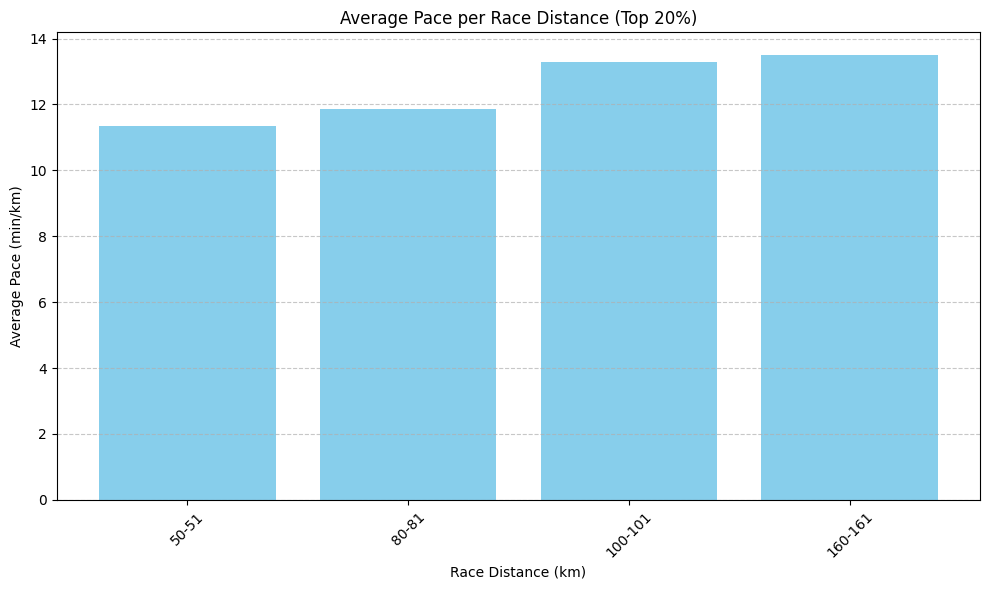

In [9]:
#Visualizations top 20% of paces per race distances

# Create lists to store race distances and corresponding average paces
race_distances = []
average_paces = []

# Iterate over each race distance range
for result in average_pace_per_distance_list:
    # Extract race distance range and average pace
    race_distance_range = f"{result[0][0]}-{result[0][1]}"
    average_pace = result[1]
    
    # Append to the lists
    race_distances.append(race_distance_range)
    average_paces.append(average_pace)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(race_distances, average_paces, color='skyblue')

# Add title and labels
plt.title('Average Pace per Race Distance (Top 20%)')
plt.xlabel('Race Distance (km)')
plt.ylabel('Average Pace (min/km)')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




  Race Distance Years with Most Finishers
0         50-51                    [2018]
1         80-81                    [2022]
2       100-101                    [2016]
3       160-161                    [2018]


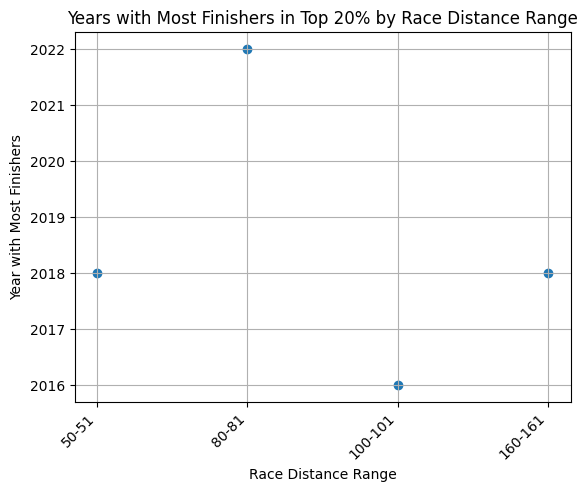

In [10]:
#

# Convert "Athlete performance" column to numeric
df['Athlete performance'] = pd.to_numeric(df['Athlete performance'], errors='coerce')

# Define the race distance ranges
race_distance_ranges = [(50, 51), (80, 81), (100, 101), (160, 161)]

# Create an empty list to store the results
results = []

# Iterate over each race distance range
for range_start, range_end in race_distance_ranges:
    # Filter the DataFrame for the specified race distance range
    filtered_df = df[(df["Event distance"] >= range_start) & (df["Event distance"] < range_end)]
    
    # Filter the top 20% of finishers by sorting the DataFrame by "Athlete performance"
    top_20_percent_df = filtered_df.nlargest(int(0.2 * len(filtered_df)), 'Athlete performance')
    
    # Group the data by year
    grouped_by_year = top_20_percent_df.groupby('Year of event')
    
    # Calculate the number of finishers in the top 20% for each year
    finishers_count_by_year = grouped_by_year.size()
    
    # Find the year(s) with the maximum number of finishers in the top 20%
    max_finishers_year = finishers_count_by_year[finishers_count_by_year == finishers_count_by_year.max()].index.tolist()
    
    # Append the results to the list
    results.append({'Race Distance': f'{range_start}-{range_end}', 'Years with Most Finishers': max_finishers_year})

# Convert the list of dictionaries into a DataFrame
most_finishers_years_df = pd.DataFrame(results)

# Print the DataFrame
print(most_finishers_years_df)








# Create empty lists to store x and y data
x_values = []
y_values = []

# Iterate over each row in the DataFrame
for index, row in most_finishers_years_df.iterrows():
    race_distance = row['Race Distance']
    years = row['Years with Most Finishers']
    
    # Append race distance to x_values list
    x_values.extend([race_distance] * len(years))
    
    # Append number of years to y_values list
    y_values.extend(years)

# Create the scatter plot
plt.scatter(x_values, y_values)

# Add labels and title
plt.xlabel('Race Distance Range')
plt.ylabel('Year with Most Finishers')
plt.title('Years with Most Finishers in Top 20% by Race Distance Range')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.grid(True)
plt.show()


Lower Bound Ranges:
   Start  End  Lower Bound
0     50   51     4.864022
1     80   81     5.815469
2    100  101     5.047724
3    160  161     7.289924

Upper Bound Ranges:
   Start  End  Upper Bound
0     50   51    11.293370
1     80   81    11.860050
2    100  101    12.901692
3    160  161    13.591164
        Year of event     Event dates  \
97               2018      06.01.2018   
98               2018      06.01.2018   
99               2018      06.01.2018   
1092             2018      24.03.2018   
1093             2018      24.03.2018   
...               ...             ...   
6811032          2015  16.-17.10.2015   
6821805          2015  10.-11.10.2015   
6821806          2015  10.-11.10.2015   
6821807          2015  10.-11.10.2015   
6821808          2015  10.-11.10.2015   

                                           Event name  Event distance  \
97        Yankee Springs 50 km Winter Challenge (USA)          50.000   
98        Yankee Springs 50 km Winter Challenge (U

/var/folders/r6/y72_rzjs01v5mlmhssn_w27h0000gn/T/ipykernel_55520/3127510380.py:149: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers_df = pd.concat([outliers_df, outliers_within_range])


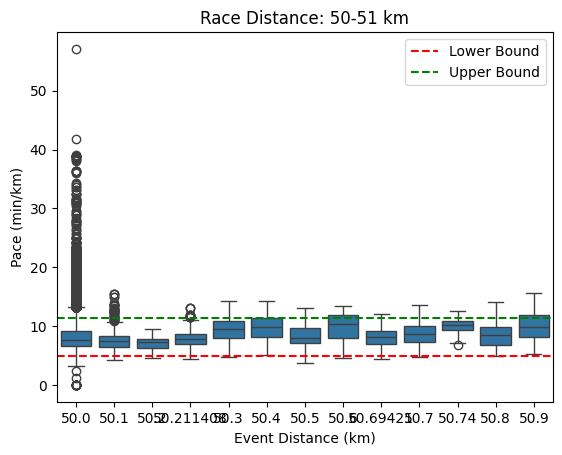

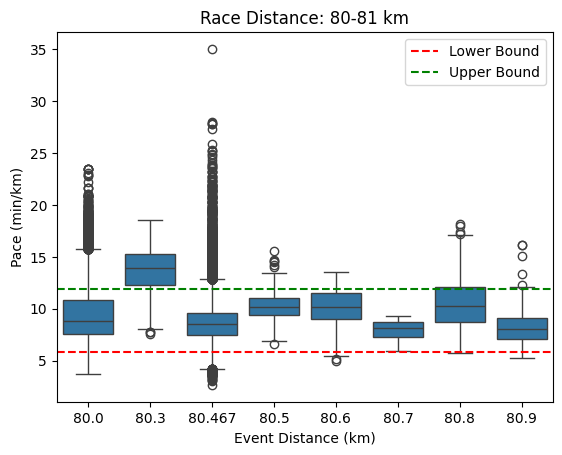

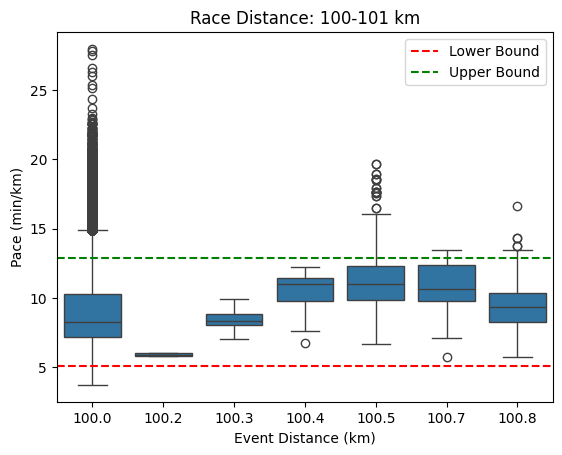

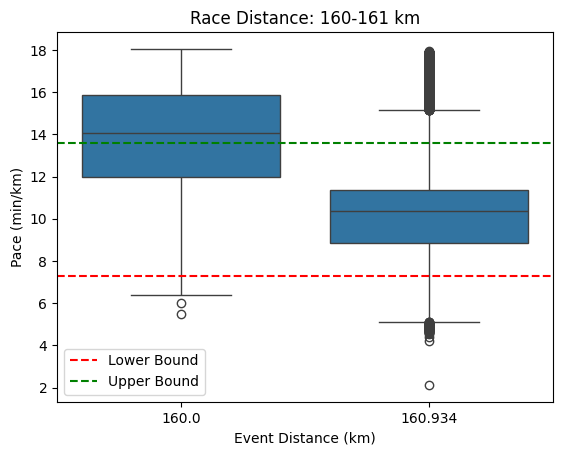

  Event distance Outlier Range
0          50-51    4.86-11.29
1          80-81    5.82-11.86
2        100-101    5.05-12.90
3        160-161    7.29-13.59


/var/folders/r6/y72_rzjs01v5mlmhssn_w27h0000gn/T/ipykernel_55520/4046470055.py:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers_df = pd.concat([outliers_df, outliers_within_range])


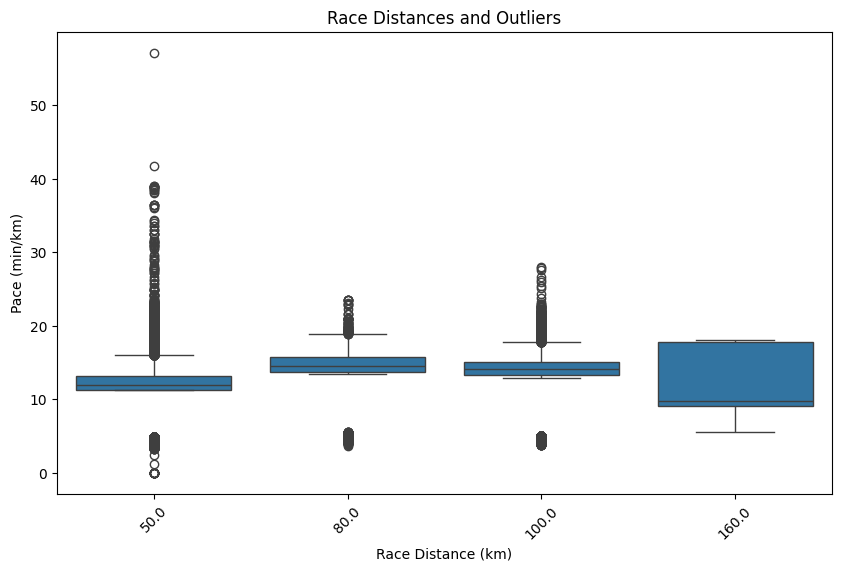

In [12]:
#Visualization 3

# Define the race distance ranges
race_distance_ranges = [(50, 51), (80, 81), (100, 101), (160, 161)]

# Create an empty list to store outlier information
outliers_info = []

# Iterate over each race distance range
for range_start, range_end in race_distance_ranges:
    # Filter the DataFrame for the specified race distance range
    filtered_df2 = df[(df["Event distance"] >= range_start) & (df["Event distance"] < range_end)]
    
    # Calculate the mean and standard deviation of pace for the filtered DataFrame
    mean_pace = filtered_df2["Pace(min/km)"].mean()
    std_dev_pace = filtered_df2["Pace(min/km)"].std()
    
    # Define the lower and upper bounds for identifying outliers (e.g., 1.5 times the standard deviation from the mean)
    lower_bound = mean_pace - 1.5 * std_dev_pace
    upper_bound = mean_pace + 1.5 * std_dev_pace
    
    # Create a range of values for outliers
    outlier_range = f"{lower_bound:.2f}-{upper_bound:.2f}"
    
    # Add the race distances and outlier ranges to the outliers_info list
    outliers_info.append({"Event distance": f"{range_start}-{range_end}", "Outlier Range": outlier_range})

    # Create boxplot
    sns.boxplot(x=filtered_df2["Event distance"], y=filtered_df2["Pace(min/km)"], ax=plt.gca())
    plt.title(f'Race Distance: {range_start}-{range_end} km')
    plt.xlabel('Event Distance (km)')
    plt.ylabel('Pace (min/km)')
    plt.axhline(lower_bound, color='r', linestyle='--', label='Lower Bound')
    plt.axhline(upper_bound, color='g', linestyle='--', label='Upper Bound')
    plt.legend()
    plt.show()

# Convert the outliers_info list into a DataFrame
outliers_pace_range_df = pd.DataFrame(outliers_info)

# Print the outliers_pace_range_df DataFrame
print(outliers_pace_range_df)


#summary

# Define the race distance ranges
race_distance_ranges = [(50.0, 50.001), (80.0, 80.001), (100.0, 100.001), (160.0, 160.001)]

# Create an empty DataFrame to store outliers
outliers_df = pd.DataFrame(columns=df.columns)

# Iterate over each race distance range
for range_start, range_end in race_distance_ranges:
    # Filter the DataFrame for the specified race distance range
    filtered_df = df[(df["Event distance"] >= range_start) & (df["Event distance"] < range_end)]
    
    # Calculate the mean and standard deviation of pace for the filtered DataFrame
    mean_pace = filtered_df["Pace(min/km)"].mean()
    std_dev_pace = filtered_df["Pace(min/km)"].std()
    
    # Define the lower and upper bounds for identifying outliers (e.g., 1.5 times the standard deviation from the mean)
    lower_bound = mean_pace - 1.5 * std_dev_pace
    upper_bound = mean_pace + 1.5 * std_dev_pace
    
    # Identify outliers within the specified range and append them to the outliers DataFrame
    outliers_within_range = filtered_df[(filtered_df["Pace(min/km)"] < lower_bound) | (filtered_df["Pace(min/km)"] > upper_bound)]
    outliers_df = pd.concat([outliers_df, outliers_within_range])

# Create a boxplot comparing race distances and their outliers using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x="Event distance", y="Pace(min/km)", data=outliers_df)
plt.title('Race Distances and Outliers')
plt.xlabel('Race Distance (km)')
plt.ylabel('Pace (min/km)')
plt.xticks(rotation=45)
plt.show()

# # Combine lower and upper bound ranges into one DataFrame
# bounds_df = pd.merge(lower_bounds_df, upper_bounds_df, on=["Start", "End"])

# # Create a boxplot
# plt.figure(figsize=(10, 6))
# plt.boxplot([bounds_df["Lower Bound"], bounds_df["Upper Bound"]], labels=["Lower Bound", "Upper Bound"])
# plt.title('Box and Whisker Plot of Lower and Upper Bound Ranges for Outliers')
# plt.xlabel('Bound Type')
# plt.ylabel('Bound for Outliers (min/km)')
# plt.grid(True)
# plt.show()






# # Plot upper and lower bound ranges
# plt.figure(figsize=(10, 6))

# # Plot lower bound ranges
# for index, row in lower_bounds_df.iterrows():
#     plt.plot([row['Start'], row['End']], [row['Lower Bound'], row['Lower Bound']], color='blue', linestyle='-', label=f"Lower Bound - Race Distance {row['Start']}-{row['End']}")

# # Plot upper bound ranges
# for index, row in upper_bounds_df.iterrows():
#     plt.plot([row['Start'], row['End']], [row['Upper Bound'], row['Upper Bound']], color='red', linestyle='--', label=f"Upper Bound - Race Distance {row['Start']}-{row['End']}")

# plt.title('Upper and Lower Bound Ranges for Outliers per Race Distance')
# plt.xlabel('Race Distance (km)')
# plt.ylabel('Bound for Outliers (min/km)')
# plt.legend()
# plt.grid(True)
# plt.show()

In [13]:
#random dataset of 500 points

# Generate a random sample of 500 data points
random_sample_df = df.sample(n=500, random_state=42)  # Set random_state for reproducibility

# Print the random sample DataFrame
print(random_sample_df)

         Year of event     Event dates  \
6255803           2014      13.12.2014   
835056            2016      26.06.2016   
2927674           2021      25.06.2021   
2679549           2020  22.-23.08.2020   
6642468           2015  12.-13.06.2015   
...                ...             ...   
6736264           2015      19.12.2015   
171084            2018      31.03.2018   
1501557           2017      24.06.2017   
2347431           2019      31.08.2019   
6236574           2014      26.07.2014   

                                              Event name  Event distance  \
6255803  Yilan Dongshan River 100km Ultra-Marathon (TPE)           100.0   
835056               Pistoia-Abetone Ultramarathon (ITA)            50.0   
2927674                              Cortina Trail (ITA)            48.0   
2679549                  Shawnee Hills 100 - 50 Km (USA)            50.0   
6642468                           100 km Lauf Biel (SUI)           100.0   
...                                    

In [18]:
#VIZ

#average paces

# Calculate average pace for specific distances
avg_pace_50km = time_in_mins / df[df["Event distance"].between(50, 51)]["Event distance"] 
avg_pace_80km = time_in_mins / df[df["Event distance"].between(80, 81)]["Event distance"] 
avg_pace_100km = time_in_mins / df[df["Event distance"].between(100, 101)]["Event distance"] 
avg_pace_161km = time_in_mins / df[df["Event distance"].between(160, 161)]["Event distance"] 

# Create lists to store race distances and corresponding average paces
race_distances = ['50 km', '80 km', '100 km', '161 km']
average_paces = [avg_pace_50km.mean(), avg_pace_80km.mean(), avg_pace_100km.mean(), avg_pace_161km.mean()]

# Create a bar plot
data = [go.Bar(x=race_distances, y=average_paces, marker=dict(color='skyblue'))]

# Layout settings
layout = go.Layout(title='Average Pace for Different Race Distances',
                   xaxis=dict(title='Race Distance'),
                   yaxis=dict(title='Average Pace (min/km)'),
                   plot_bgcolor='rgba(0,0,0,0)',
                   margin=dict(l=50, r=50, t=50, b=50))

# Create figure object
fig = go.Figure(data=data, layout=layout)

# Save the plot as an HTML file
pio.write_html(fig, file='average_pace_race_distances.html')




#average paces for top 20%

# Create lists to store race distances and corresponding average paces
race_distances = []
average_paces = []

# Iterate over each race distance range
for result in average_pace_per_distance_list:
    # Extract race distance range and average pace
    race_distance_range = f"{result[0][0]}-{result[0][1]}"
    average_pace = result[1]
    
    # Append to the lists
    race_distances.append(race_distance_range)
    average_paces.append(average_pace)

# Create a bar plot
data = [go.Bar(x=race_distances, y=average_paces, marker=dict(color='skyblue'))]

# Layout settings
layout = go.Layout(title='Average Pace per Race Distance (Top 20%)',
                   xaxis=dict(title='Race Distance (km)'),
                   yaxis=dict(title='Average Pace (min/km)'),
                   plot_bgcolor='rgba(0,0,0,0)',
                   margin=dict(l=50, r=50, t=50, b=50))

# Create figure object
fig = go.Figure(data=data, layout=layout)

# Save the plot as an HTML file
pio.write_html(fig, file='average_pace_race_distance_top_20_percent.html')








#Outliers
# Define the race distance ranges
race_distance_ranges = [(50, 51), (80, 81), (100, 101), (160, 161)]

# Create an empty list to store outlier information
outliers_data = []

# Iterate over each race distance range
for range_start, range_end in race_distance_ranges:
    # Filter the DataFrame for the specified race distance range
    filtered_df = df[(df["Event distance"] >= range_start) & (df["Event distance"] < range_end)]
    
    # Create box and whisker plot
    box_plot = go.Box(y=filtered_df["Pace(min/km)"], name=f'{range_start}-{range_end} km', boxmean='sd', marker=dict(color='blue'))
    
    # Append box plot data to the list
    outliers_data.append(box_plot)

# Create layout for the plot
layout = go.Layout(title='Pace Distribution per Race Distance',
                   xaxis=dict(title='Race Distance (km)'),
                   yaxis=dict(title='Pace (min/km)'),
                   plot_bgcolor='rgba(0,0,0,0)',
                   margin=dict(l=50, r=50, t=50, b=50))

# Create figure object
fig = go.Figure(data=outliers_data, layout=layout)

# Save the plot as an HTML file
pio.write_html(fig, file='pace_distribution_race_distance.html')